In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('D:/dip(AIML(cse))/kaggle/titanic.csv')
df=pd.DataFrame(data)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df_clean=df.dropna()
print(df_clean.isnull().sum())
print(df_clean.shape)
df_clean=df.dropna(subset=['age','fare'])

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
(182, 15)


<Axes: >

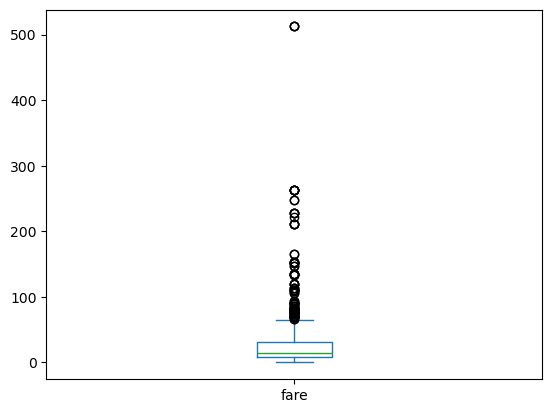

In [7]:
df['fare'].plot(kind='box')

In [8]:
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr


In [17]:
fare_arr=df['fare']
lower_cap=0
upper_cap=50
for i in df['fare']:
    if i < lower_bound:
        df['fare']=df['fare'].replace(i,lower_cap)
    elif i > upper_bound:
        df['fare']=df['fare'].replace(i,upper_cap)

<Axes: >

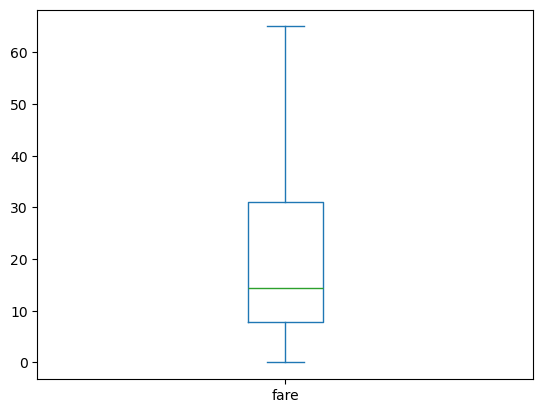

In [18]:
df['fare'].plot(kind='box')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

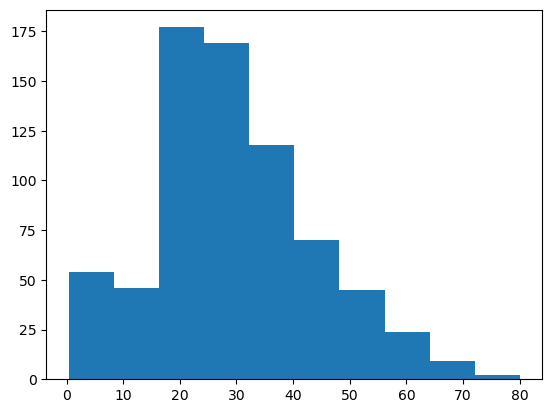

In [19]:
plt.hist(df['age'])

<Axes: xlabel='pclass'>

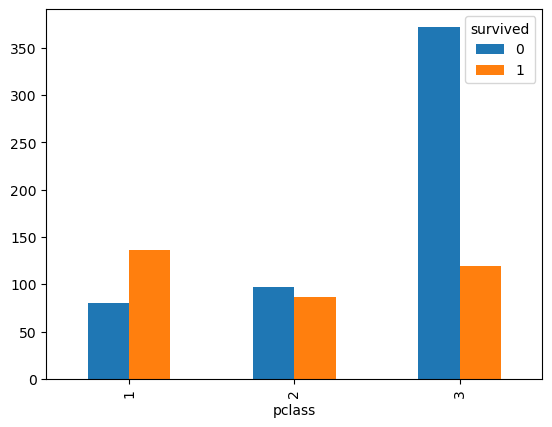

In [20]:
a=df.groupby(['pclass','survived']).size().unstack()
a.plot(kind='bar')

<Axes: xlabel='count', ylabel='sex'>

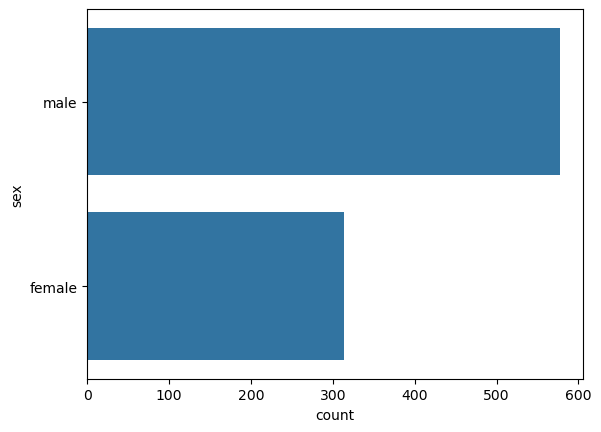

In [22]:
import seaborn as sns
sns.countplot(df['sex'])